In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Data

/content/drive/MyDrive/Artificial_intelligence/data


In [ ]:
ls

bangla_banknote_v2/  flowers/             rice_image_dataset.zip  VN_food.zip
Bangla_money.zip     Rice_Image_Dataset/  VN_food/


In [ ]:
# !unzip 'Bangla_money.zip'

In [ ]:
import cv2
from pathlib import Path
money_dataset_folder = '/content/drive/MyDrive/Data/bangla_banknote_v2/Training/'
classnames = []
for path in Path(money_dataset_folder).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(money_dataset_folder+classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['1', '10', '100', '1000', '2', '20', '5', '50', '500']
1
10
100
1000
2
20
5
50
500


In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(522, 64, 64, 3)
(131, 64, 64, 3)
(522, 9)
(131, 9)


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

[0. 0. 1. 0. 0. 0. 0. 0. 0.]


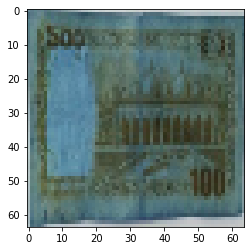

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[6])
print(y_train[6])

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape, padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
# ANN
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)       

In [ ]:
import keras
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
5/5 - 1s - loss: 2.1837 - accuracy: 0.1437 - 648ms/epoch - 130ms/step
Epoch 2/100
5/5 - 0s - loss: 2.1412 - accuracy: 0.1897 - 99ms/epoch - 20ms/step
Epoch 3/100
5/5 - 0s - loss: 2.1241 - accuracy: 0.1533 - 90ms/epoch - 18ms/step
Epoch 4/100
5/5 - 0s - loss: 2.1332 - accuracy: 0.1820 - 79ms/epoch - 16ms/step
Epoch 5/100
5/5 - 0s - loss: 2.0920 - accuracy: 0.2031 - 80ms/epoch - 16ms/step
Epoch 6/100
5/5 - 0s - loss: 2.0232 - accuracy: 0.2433 - 79ms/epoch - 16ms/step
Epoch 7/100
5/5 - 0s - loss: 1.9634 - accuracy: 0.2989 - 76ms/epoch - 15ms/step
Epoch 8/100
5/5 - 0s - loss: 1.9008 - accuracy: 0.2931 - 80ms/epoch - 16ms/step
Epoch 9/100
5/5 - 0s - loss: 1.7646 - accuracy: 0.3238 - 78ms/epoch - 16ms/step
Epoch 10/100
5/5 - 0s - loss: 1.6158 - accuracy: 0.4406 - 75ms/epoch - 15ms/step
Epoch 11/100
5/5 - 0s - loss: 1.8585 - accuracy: 0.3352 - 77ms/epoch - 15ms/step
Epoch 12/100
5/5 - 0s - loss: 1.5252 - accuracy: 0.4598 - 80ms/epoch - 16ms/step
Epoch 13/100
5/5 - 0s - loss: 1.337

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 21ms/step - loss: 0.0455 - accuracy: 0.9847


[0.045504722744226456, 0.9847328066825867]

In [ ]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
ls

bangla_banknote_v2/  flowers/     Rice_Image_Dataset.zip  VN_food.zip
Bangla_money.zip     my_model.h5  VN_food/


In [ ]:
from keras.models import load_model
model = load_model('my_model.h5')

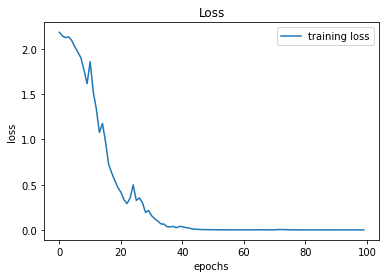

In [ ]:
# plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
history.history['accuracy']

(64, 64, 3)
1/1 [==============================] - 0s 16ms/step
Pred:  10
True label:  10


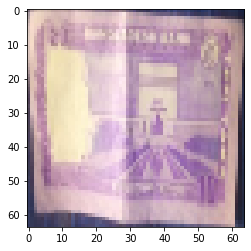

In [ ]:
# n = 0
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 64, 64, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])